<a href="https://colab.research.google.com/github/nikhilcss97/Keras_practise/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Y_train.shape

(60000,)

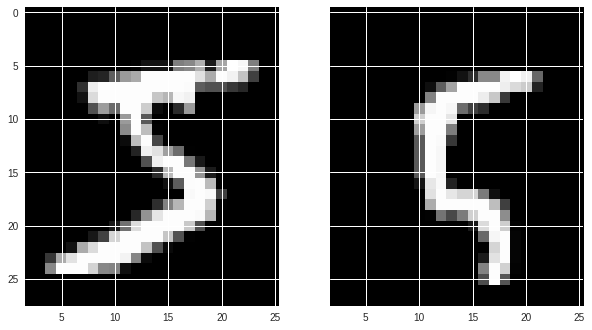

In [5]:
f, axes = plt.subplots(1, 2, sharey=True)
f.set_figwidth(10)
    
axes[0].imshow(X_train[0], cmap='gray')
axes[1].imshow(X_train[100], cmap='gray')



In [0]:
X_train= X_train.reshape(60000, 28, 28, 1)
X_test= X_test.reshape(10000, 28, 28, 1)
Y_train= Y_train.reshape(60000, 1)
Y_test= Y_test.reshape(10000, 1)
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [0]:
datagen= ImageDataGenerator(featurewise_center= True, featurewise_std_normalization= True, rotation_range= 7, height_shift_range= 1,  width_shift_range= 1, shear_range= 4, zoom_range= .3,
                            validation_split= .1 )

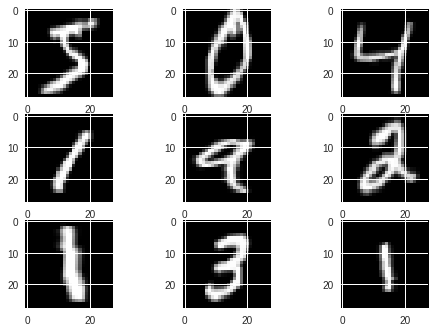

In [10]:

datagen.fit(X_train)
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size= 10, shuffle= False):
  for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	  
    
  plt.show()
  break

In [11]:
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size= 30000, shuffle= True):
  X_train= np.concatenate((X_train, X_batch), axis= 0)
  Y_train= np.concatenate((Y_train, Y_batch), axis= 0)
  
  
  break
  
  
print(X_train.shape)
  
#   X_train.append(X_batch)
#   Y_train.append(Y_batch)
  

(90000, 28, 28, 1)


In [12]:
print(Y_train.shape)

(90000, 1)


In [0]:
classes, array= np.unique(Y_train, return_inverse= True)
Y_train_ohe= keras.utils.to_categorical(array, len(classes))

classes, array= np.unique(Y_test, return_inverse= True)
Y_test_ohe= keras.utils.to_categorical(array, len(classes))

X_train= X_train/255
X_test= X_test/255


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPool2D

In [0]:
model= Sequential()

model.add(Conv2D(50, kernel_size= 3, padding= 'same', activation= 'relu', input_shape= (28, 28, 1)))    
model.add(MaxPool2D(3, strides= 1, padding= 'same'))
model.add(Conv2D(40, kernel_size= 3, padding= 'valid', activation= 'relu'))    
model.add(MaxPool2D(3, strides= 1, padding= 'valid'))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

In [0]:
model.compile(loss= 'categorical_crossentropy', optimizer= keras.optimizers.adam(lr=.0007, decay=1e-6), metrics= ['accuracy'])

In [22]:
model.fit(X_train, Y_train_ohe, epochs= 30, batch_size= 1000, validation_split= .1, shuffle= True)

Train on 81000 samples, validate on 9000 samples
Epoch 1/30
81000/81000 [==============================] - 12s 143us/step - loss: 0.8721 - acc: 0.7398 - val_loss: 2.0128 - val_acc: 0.6026
Epoch 2/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.5316 - acc: 0.8714 - val_loss: 1.2420 - val_acc: 0.7264
Epoch 3/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.3300 - acc: 0.9088 - val_loss: 0.6372 - val_acc: 0.8419
Epoch 4/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.2310 - acc: 0.9343 - val_loss: 0.4507 - val_acc: 0.8792
Epoch 5/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.1880 - acc: 0.9459 - val_loss: 0.3781 - val_acc: 0.9040
Epoch 6/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.1629 - acc: 0.9526 - val_loss: 0.3257 - val_acc: 0.9124
Epoch 7/30
81000/81000 [==============================] - 11s 130us/step - loss: 0.1446 - acc: 0.9586 - val_loss: 0.2

In [23]:
model.evaluate(X_test, Y_test_ohe)

10000/10000 [==============================] - 1s 147us/step


[0.03264528340158115, 0.9934]